## Shaft and Bearing Calculation


In [8]:
import math


In [9]:
# Minimum shaft diameter

P_p = 1760
n = 38800 #rotations per minute
tau_al =307*10**6#Allowable shear stress Aluminium 

d_w = 3.65*(P_p/(n * tau_al))**(1/3)

print('Minimum shaft diameter =' ,d_w, 'm')


Minimum shaft diameter = 0.0019296285672620367 m


Axial Forces on the impeller

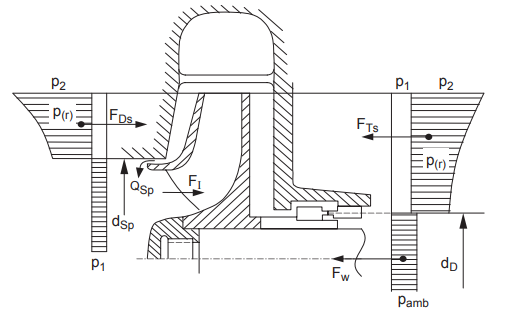
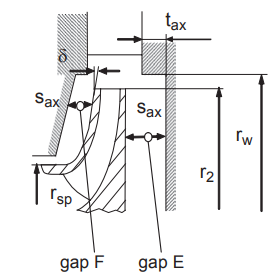

In [10]:
# Axial Force Calculation Gulich ca. p. 600

# For one stage! Needs to be evluated for every stage

#From pump iteration

p_1 = 2.68 *10**5 #TBD
d_D = 0.0074 #TBD = d_1t
d_2 = D_2 = 0.0307  #TBD
g = 9.81
rho = 1142
V = 0.000565 # [m^3/s] volumetric flow rate (3)
c_1m = 9.86 
c_2m = 3.1
#From chapter 9.2 Gulich
epsilon = (90/180)*math.pi # [Degrees] for radial pump
p_amb = 10**5# [Pa] Ambient pressure 



F_I = rho*V*(c_1m -c_2m* math.cos(epsilon)) #Impluse Force
F_w = math.pi/4*d_D**2*(p_amb-p_1) # Forces Unausgeglichene Wellenschübe

# Total axial force for one stage
F_ax = - F_I +F_w # Axial force without clutch
print('F_w =',F_w)
print('F_I=', F_I)
print('F_ax =', F_ax)

F_w = -7.225411775844237
F_I= 6.3619677999999995
F_ax = -13.587379575844237


Radial forces on the impeller

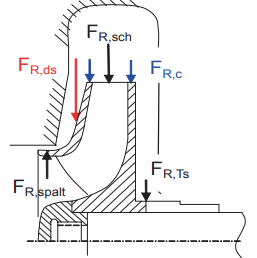
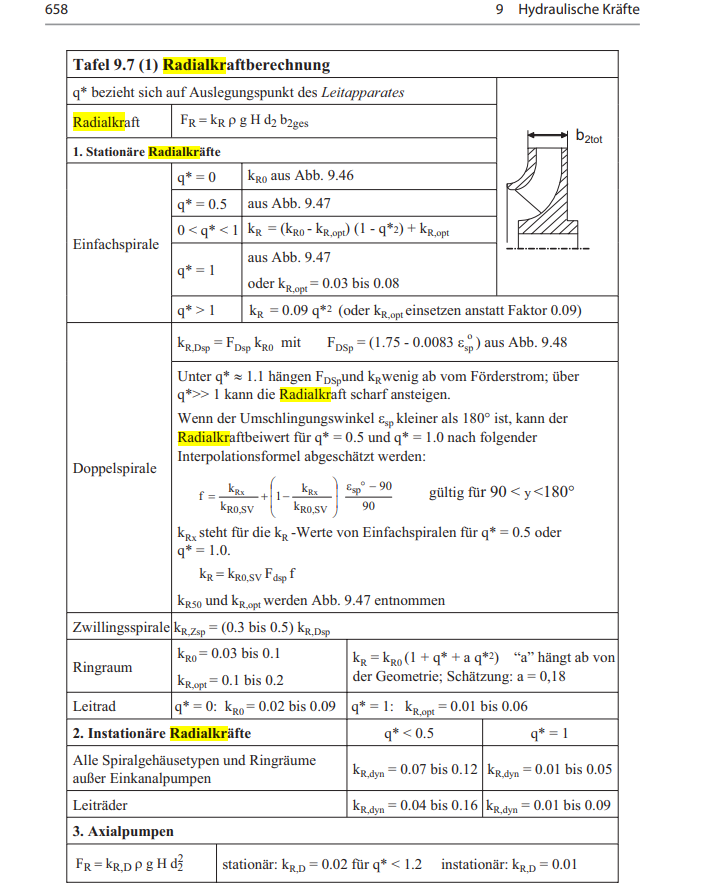

In [11]:
#Radial Force calculation axial pump, one stage pump!
H = 237.5
k_0 = 0.5 # maximum value p.598

#Static Radial Force calculation according to Gülich p.658 radial pump, one stage pump!

N_St = 1
b_2tot = 0.00589 # 
k_R =0.5 #conservative assumption for max F_r. k_R0 for q*=0 assumed.
S_dyn = 2 #Safety factor to include dynamic forces which can not be easily calculated
F_r = k_R*rho*g*H*d_2*b_2tot*S_dyn*N_St
print('F_r=',F_r)


F_r= 481.11887529675


In [12]:
#Bearing calculation
L_10h = 5 # [h] Nominal Life 
p = 3 #Life Exponent (roller Bearing)

e = abs(F_ax/F_r) #Look into the table for X, Y
S_0 = 2 #Statische Tragsicherheit Roloff Matek p. 570
S_cry = 1.25# Safety factor to include safety against cryogenic effects
X = 1 #From table below
Y = 0 #From table below
P = (X*F_r+Y*F_ax)*S_cry*10**(-3) #[kN]Dynamic Loading


C_req = P * ((60*n*L_10h)/(10**6))**(1/p)

print('e =', e )
print('P =', P )
print('C_req =', C_req,'kN' )

e = 0.02824121079735992
P = 0.6013985941209374
C_req = 1.362950453959245 kN


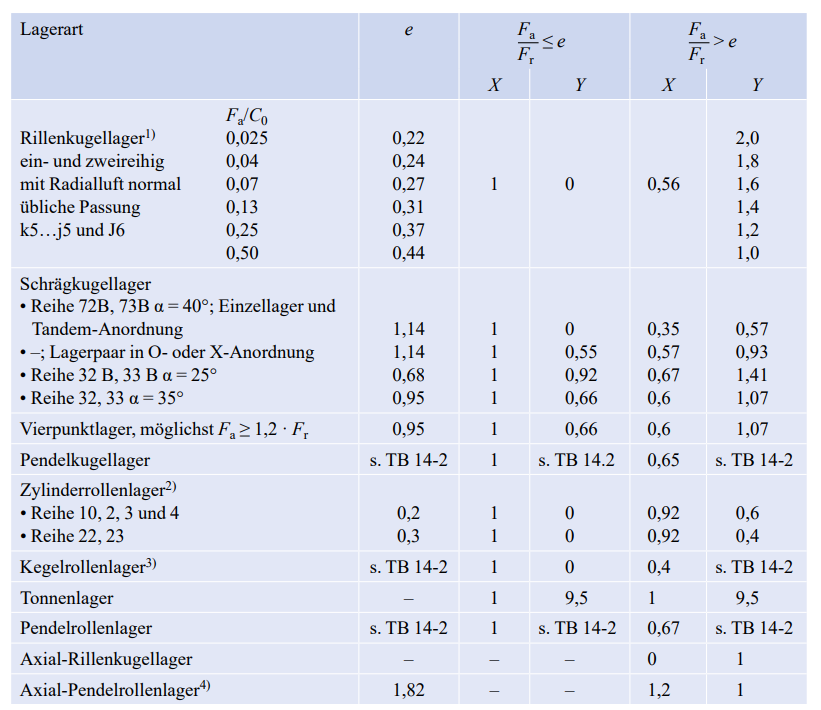

In [13]:
# Required Net Positive Suction Head Turbomachinery p.338

#omega_s = omega *(V**0.5)/(g*delta_H)**(3/4) #Specific Speed
omega_s = 0.27
lambda_c = -0.103*math.log(omega_s)+1.1855
lambda_w = 0.2144*math.exp(0.1745*omega_s)
w_1t = w_1 = 28.6 #Equal?
p_v_Ox = 0.9803*10**5 
p_s = p_1 =2*10**5 #TBD?
c_s = c_1 = 12.9#TBD?


NPSH_R = lambda_c*(c_1m**2)/(2*g)+lambda_w*(w_1t**2)/(2*g) #Required Net Positive Suction Head
NPSH = (p_s-p_v_Ox)/(rho*g)+c_s**2/(2*g) #Net positive suction head 

print('NPSH_R =',NPSH_R)
print('NPSH =',NPSH)
if NPSH > NPSH_R:
    print('NPSH > NPSH_R, Cavitation avoided!)')
else:
    print('Error: NPSH <= NPSH_R, Caviation exists!')


NPSH_R = 15.912127963945725
NPSH = 17.58366136988062
NPSH > NPSH_R, Cavitation avoided!)


## Mass budget


In [14]:
# Mass budget pump components

print('Basic approach by Humble p. 266')
#Maximum
tau = P_p /((n*2*math.pi)/60)
A = 2.6 # Conservative values [1.3-2.6]
B= 0.667 # Conservative values [0.6 -0.667]

m_geoHmax = A*tau**B
print('m_geoHmax =',m_geoHmax)

#Minimum
A = 1.3 # Conservative values [1.3-2.6]
B= 0.6 # Conservative values [0.6 -0.667]

m_geoHmin = A*tau**B
print('m_geoHmin =',m_geoHmin)
print('According to Humble the geometrie of the pump will weigh between[',m_geoHmin,'-',m_geoHmax,'] kg.')


print('Geometry masses individual assumptions:')
rho_titan = 4500
rho_inconel = 8400
rho_alu = 2700

# shaft
l_shaft = 0.2
d_shaft = 0.015
m_shaft = l_shaft*(d_shaft/2)**2*math.pi*rho_inconel
print('m_shaft =',m_shaft)

#inducer + impeller
m_inducer = m_shaft/5
m_impeller = m_shaft*3/5
print('m_inducer =',m_inducer)
print('m_impeller =',m_impeller)

#housing (cylinder)
d_housing = 0.05
l_housing = l_shaft
t_housing = 0.002
m_housing = math.pi * ((d_housing/2)**2-((d_housing-2*t_housing)/2)**2)*l_housing*rho_inconel
print('m_housing =',m_housing )

#additional masses
m_add = 0.15

m_geo = m_shaft + m_inducer + m_impeller + m_housing + m_add
print('m_geo =',m_geo)

if m_geo< m_geoHmax and m_geo>  m_geoHmin:
    print('The individual assumptions lie withtin Humbles values.')
elif m_geo> m_geoHmax: 
    print('The individual assumptions are larger than Humbles values.')
elif m_geo< m_geoHmin:
    print('The individual assumptions are smaller than Humbles values.')

Basic approach by Humble p. 266
m_geoHmax = 1.4880600188844153
m_geoHmin = 0.786927544223815
According to Humble the geometrie of the pump will weigh between[ 0.786927544223815 - 1.4880600188844153 ] kg.
Geometry masses individual assumptions:
m_shaft = 0.29688050576423547
m_inducer = 0.0593761011528471
m_impeller = 0.1781283034585413
m_housing = 0.5066760631709627
m_geo = 1.1910609735465865
The individual assumptions lie withtin Humbles values.
